In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, datasets
import numpy as np
sns.set(style="white", color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [5]:
iris = datasets.load_iris()
#print(iris.data)
#print(iris.target)

print(iris)

data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['Species'])

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [6]:
data['Species'] = data['Species'].map({0.0:'setosa', 1.0: 'versicolor', 2.0: 'virginic'})

In [7]:
data.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [8]:
data.groupby(data.Species).count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginic,50,50,50,50


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [10]:
data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PentalWidthCm', 'Species']

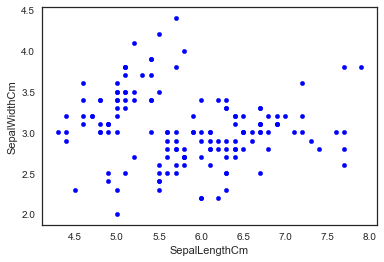

In [11]:
data.plot(kind="scatter", x="SepalLengthCm", y = "SepalWidthCm", color="blue")
plt.show()

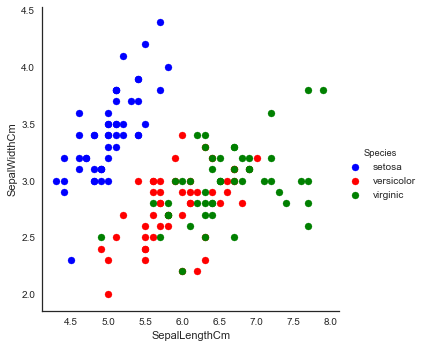

In [12]:
import seaborn as sns
KS = {'color': ['blue', 'red', 'green']}
sns.FacetGrid(data, hue_kws = KS, hue="Species", size=5)\
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
    .add_legend()
plt.show()

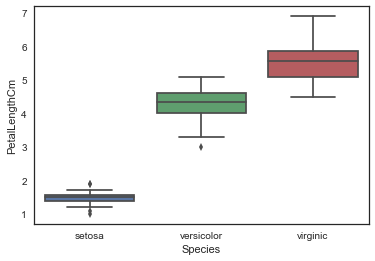

In [13]:
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.show()

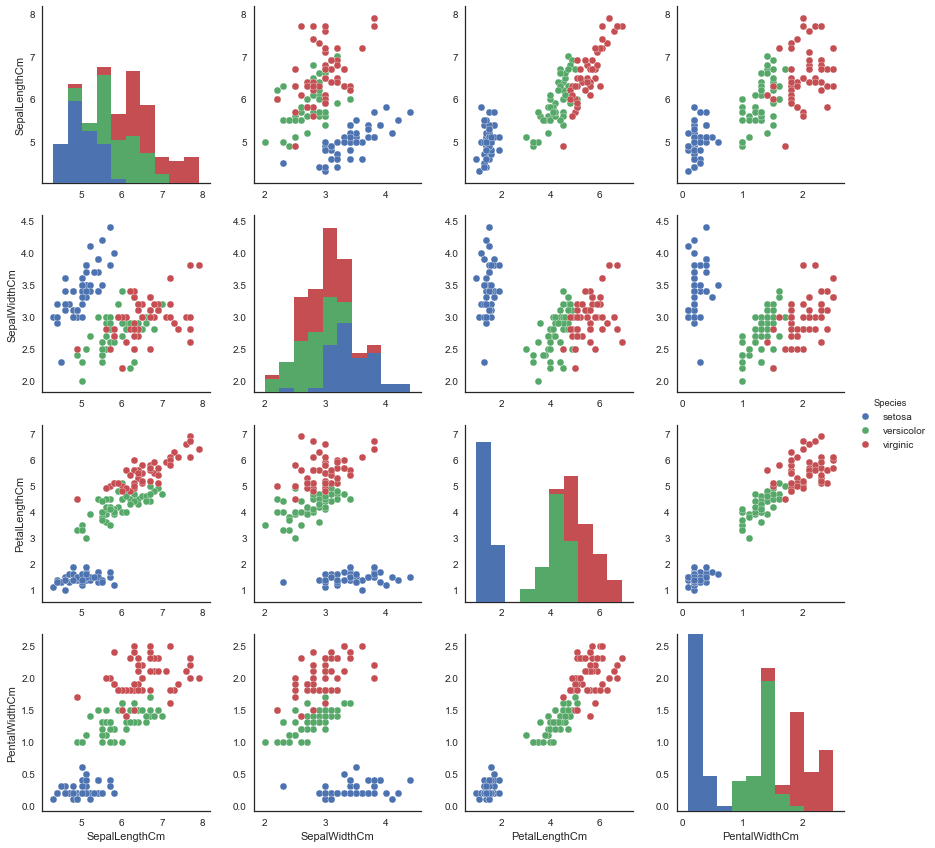

In [14]:
sns.pairplot(data, hue="Species", size=3)
plt.show()

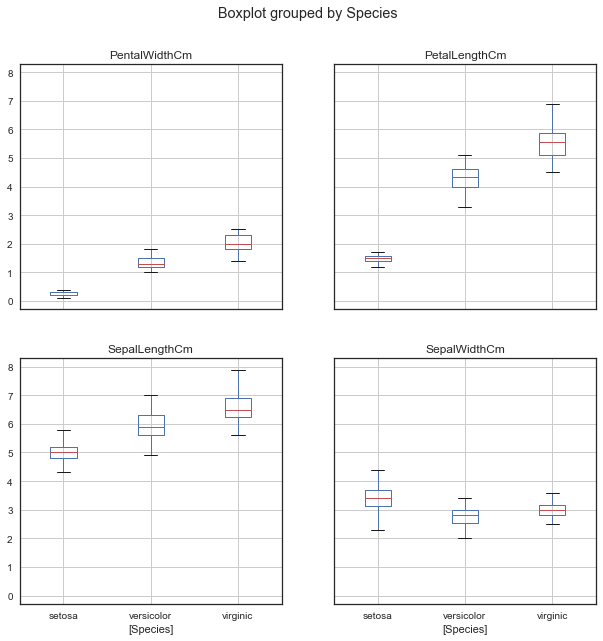

In [15]:
data.boxplot(by="Species", figsize=(10,10))
plt.show()

KNN Classifier Example

In [16]:
from sklearn import datasets
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [17]:
iris = datasets.load_iris()

In [18]:
X = iris.data
y = iris.target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [48]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [49]:
knn = KNeighborsClassifier(n_neighbors=10, p=5, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='uniform')

In [50]:
y_pred = knn.predict(X_test_std)
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Misclassified samples: %d" % (y_test != y_pred).sum())

Accuracy: 0.91
Misclassified samples: 4


In [45]:
y_train

array([0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1,
       2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0,
       2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1])